# Final Project

In [1]:
import matplotlib.pyplot as plt
import os
%matplotlib inline
%reload_ext autoreload
%autoreload 2

## Instructions

Read the entire assignment before you start solving it

### Code
- You can write your code in an IDE like PyCharm, and then import your code to this notebook. It is easier to debug.
> **Tip**: Split your code to many small functions, and write a test for each function, to prevent bugs and a lot of frustration 

### Theoretical part
- Use a "Markdown" cell to write your answers (like this cell), not a code cell.
- Write your answers in English. If you prefer to write your answers in Hebrew, attach a PDF file with the answers

<a id="submission"></a>
### Submission
The submission is in pairs. 

You should submit the following files in a **zip** file:
1. The notebook file *.ipynb
2. The notebook file downloaded as *.html
3. A file `pairwise.py` with the code for all versus all global hueristic alignment (Part 2: 1-5). You may add any additional python files that are imported by `pairwise.py`. This file will be run using the CMD or the Terminal in the following way:
```
python pairwise.py [path_to_substitution_matrix] [path_to_seq_file_1] [path_to_seq_file_2] .... [path_to_seq_file_N]
```
For example:
```
python pairwise.py sub_mat.txt A.fasta B.fasta C.fasta
```
The example files `sub_mat.txt`, `A.fasta`, `B.fasta`, `C.fasta` are provided. Make sure that executing the above line works   
The output of executing `pairwise.py` should be a file named `scores.txt` with all the computed pairwise scores (not distances). 
```
[seq1_id]\t[seq2_id]\t[score]\n
[seq1_id]\t[seq3_id]\t[score]\n
....
[seq1_id]\t[seqN_id]\t[score]\n
[seq2_id]\t[seq3_id]\t[score]\n
....
[seqN-1_id]\t[seqN_id]\t[score]\n
```
The order of the lines does not matter.   
The following file is provided as an example:
```
B	A	110
C	A	85
C	B	200
```

## Grading

The grade will be based on:
- This notebook (75 pts). 
- The code in the file `pairwise.py` and the additional python files you submitted. Your code should be clean, readable, and  documented (5 pts).
- `pairwise.py` will be run on 2 or more short DNA sequences to check how much the output scores are similar to the optimal scores, and to check if two sequences with high sequence similarity will have a higher score than two sequences with low sequence similarity (10 pts). Additional 5 points will be relative to the other students submissions. 
- `pairwise.py` will be run on 2 or more sequences of length 30,000 with different sequence similarity to measure the runtime. Points will be reduced for a runtime that is slower than 5 minutes for a pair of sequences (5 pts). Additional 5 points will be relative to the other students submissions. 

## General Description

In this project you will get 9 complete genomes of viruses that belong to the [coronavirus](https://en.wikipedia.org/wiki/Coronavirus) group of viruses.  
- You will compute the distances between each pair of genomes.
- You will use these distances to construct the neighbor-joining tree
- This tree will help you learn about their evolution

## Dataset description

9 complete DNA genomes (translated from RNA) of different strains of coronaviruses. 
There are 2 strains of the [SARS-CoV-2](https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome_coronavirus_2) - the novel coronavirus that causes the coronavirus disease 2019, 3 strains of [Bat coronavirus](https://en.wikipedia.org/wiki/Bat_virome#Coronaviruses) (extracted from bats), 2 strains of [SARS](https://en.wikipedia.org/wiki/Severe_acute_respiratory_syndrome-related_coronavirus) viruses, and 2 strains of [MERS](https://en.wikipedia.org/wiki/Middle_East_respiratory_syndrome) viruses.

| ID                          | Type            | Origin  |
| ----------------------------|:---------------:| --------:|
| NC_045512.2_SARS-CoV-2      | SARS-CoV-2      | Wuhan - China   |
| EPI_ISL_404253_SARS-CoV-2   | SARS-CoV-2      | USA      |
| JX993987.1_BAT              | Bat Coronavirus | Shaanxi - China     |
| DQ648857.1_BAT              | Bat Coronavirus | Hong-Kong   |
| EPI_ISL_402131_BAT          | Bat Coronavirus | Yunnan - China  |
| NC_004718.3_SARS            | SARS            | Canada   |
| DQ182595.1_SARS             | SARS            | China   |
| JX869059.2_MERS             | MERS            | Netherlends  |
| KT368829.1_MERS             | MERS            | Saudi Arabia |

Strain NC_045512.2_SARS-CoV-2 was obtained from the first patient sequenced in Wuhan.

## Part 1
Use the provided links, or other links, to learn about these viruses. Write a short description about each virus, what is the connection between them, and how similar/distinct they are

**Add your answer below**

Please view our answer in the file "Genomes Species Summery.pdf".

## Part 2 - Hueristic Pairwise Global Alignment

In this section, we want to compute the pairwise distances between each two genomes (a total of 36 distances).   
As you saw in the BLAST assignment, optimal local/global alignment can take very long, especially when we align the whole genomes, and not just a pair of genes.

Therefore, you will combine the FASTA and BLAST algorithms for a fast global alignment.

#### A high level description of the algorithm
Input Parameters: $k, T, X,$ Substitutions Matrix, two DNA sequences: `seq1` and `seq2`

1. **Finding HSPs** - For each kmer from `seq1`, find its match in `seq2` (HSPs)
2. **Extending HSPs to MSPs** - Extend each HSP to the left and to the right, similarily to BLAST (MSPs)
3. **Creating a graph** - Similarily to the FASTA algorithm, create a graph with all the MSPs as nodes. Create an edge between MSP1 and MSP2 if MSP2 starts after MSP1 and if they do not overlap. Decide what will be the weight of the edge.
4. **Finding a path in the graph** - Find a heaviest path in the graph, representing an alignment between `seq1` and `seq2`. Areas that were not covered by MSPs represent gaps or areas with a high number of substitutions.
5. **Pairwise Score** - Compute the score of the path, which is the sum of the MSPs scores
6. **Score to distance** - Translate the scores to distances, similar genomes will have lower distance
7. **Build a Phylogenetic tree**

### Implementation Details

### Input Files
- A zip file name `genomes` containing the input sequences, each in a different fasta format file:   
`>seq_id
sequence nucleodites...
sequence nucleodites...
`
- A substitution matrix for DNA, note that there are more than 4 characters, some represent [ambiguous nucleotides](https://genomevolution.org/wiki/index.php/Ambiguous_nucleotide)

Read all the sequence files in the folder `genomes`. For each sequence, print its length. 

**Add your answer below**

In [13]:
GENOMES_PATH = './genomes'
FASTA_FILE_SUFFIX = '.fasta'
STR_PADDING_SIZE = 30

def add_to_dict(genomes_dir, file_name, genome_dict):
    with open(os.path.join(GENOMES_PATH + '/', file_name)) as f:
            genome_id = file_name.replace(FASTA_FILE_SUFFIX, '')
            genome_len = 0
            for line in f.readlines()[1:]:
                genome_len += len(line)
            
            genome_dict[genome_id] = (genome_len)

            
# this function creates a dict in which the keys are genome ids and the values are tuples of (index, length)
# index is a value from 0-8 which will be used during the build of the distance matrix based on the scores file
def create_genomes_dict(genomes_dir):
    genome_dict = {}
    for file_name in os.listdir(genomes_dir):
        if file_name.endswith(FASTA_FILE_SUFFIX):
            add_to_dict(genomes_dir, file_name, genome_dict)
            
    return genome_dict

            
genome_dict = create_genomes_dict(GENOMES_PATH)

for seq_id, seq_length in genome_dict.items():
    print('Genome id: {} Genome length: {}'.format(seq_id.ljust(STR_PADDING_SIZE), seq_length))

Genome id: DQ182595.1_SARS                Genome length: 30078
Genome id: DQ648857.1_BAT                 Genome length: 30113
Genome id: EPI_ISL_402131_BAT             Genome length: 30229
Genome id: EPI_ISL_404253_SARS-CoV-2      Genome length: 30256
Genome id: JX869059.2_MERS                Genome length: 30496
Genome id: JX993987.1_BAT                 Genome length: 29853
Genome id: KT368829.1_MERS                Genome length: 30495
Genome id: NC_004718.3_SARS               Genome length: 30123
Genome id: NC_045512.2_SARS-CoV-2         Genome length: 30277


Read the substitution matrix `sub_mat.txt` and print it below:

In [14]:
with open('sub_mat.txt') as f:
    [print(line) for line in f]

    A   T   G   C   S   W   R   Y   K   M   B   V   H   D   N   U

A   5  -4  -4  -4  -4   1   1  -4  -4   1  -4  -1  -1  -1  -2  -4

T  -4   5  -4  -4  -4   1  -4   1   1  -4  -1  -4  -1  -1  -2   5

G  -4  -4   5  -4   1  -4   1  -4   1  -4  -1  -1  -4  -1  -2  -4

C  -4  -4  -4   5   1  -4  -4   1  -4   1  -1  -1  -1  -4  -2  -4

S  -4  -4   1   1  -1  -4  -2  -2  -2  -2  -1  -1  -3  -3  -1  -4

W   1   1  -4  -4  -4  -1  -2  -2  -2  -2  -3  -3  -1  -1  -1   1

R   1  -4   1  -4  -2  -2  -1  -4  -2  -2  -3  -1  -3  -1  -1  -4

Y  -4   1  -4   1  -2  -2  -4  -1  -2  -2  -1  -3  -1  -3  -1   1

K  -4   1   1  -4  -2  -2  -2  -2  -1  -4  -1  -3  -3  -1  -1   1

M   1  -4  -4   1  -2  -2  -2  -2  -4  -1  -3  -1  -1  -3  -1  -4

B  -4  -1  -1  -1  -1  -3  -3  -1  -1  -3  -1  -2  -2  -2  -1  -1

V  -1  -4  -1  -1  -1  -3  -1  -3  -3  -1  -2  -1  -2  -2  -1  -4

H  -1  -1  -4  -1  -3  -1  -3  -1  -3  -1  -2  -2  -1  -2  -1  -1

D  -1  -1  -1  -4  -3  -1  -1  -3  -1  -3  -2  -2  -2  -1  -1 

### 1. Finding HSPs
For each kmer from `seq1`, find its match in `seq2` (an HSP).  
An HSP can be an exact match (like in FASTA), or an approximate match (like in BLAST) that has a score larger than the parameter $T$. Write a function that recieves the parameters $k$ and $T$. Later decide the values of these parameters.

You can use the `HSP` object below:

In [15]:
class HSP:
    def __init__(self, seq1_start, seq1_end, seq2_start, seq2_end, score):
        self.seq1_start = seq1_start
        self.seq1_end = seq1_end
        self.seq2_start = seq2_start
        self.seq2_end = seq2_end
        self.score = score

    def size(self):
        return self.seq1_end - self.seq1_start

    def __eq__(self, other):
        """equals function"""
        if isinstance(other, self.__class__):
            is_seq1_eq = self.seq1_start == other.seq1_start and self.seq1_end == other.seq1_end
            is_seq2_eq = self.seq2_start == other.seq2_start and self.seq2_end == other.seq2_end
            return is_seq1_eq and is_seq2_eq and self.score == other.score
        return False

    def __ne__(self, other):
        """Define a non-equality test"""
        return not self.__eq__(other)

    def __hash__(self):
        return hash(str((self.seq1_start, self.seq1_end, self.seq2_start, self.seq2_end, self.score)))

    def __str__(self):
        return (
                f'Score: {self.score}\n'
                f'Seq1: [{self.seq1_start}, {self.seq1_end}]\n'
                f'Seq2: [{self.seq2_start}, {self.seq2_end}]\n'
                )

    def __repr__(self):
        return self.__str__()

### 2. Extending HSPs to MSPs
The extension of an HSP is very heavy computationally. A simple implementation can run more than an hour. Perticularily if the sequences are very similar, then almost every HSP will be extended, and each extension will probably have a large size (the $X$ parameter can't help with that). 

We want to reduce the number of HSPs to be extended to MSPS. Therefore, you can implement the following methods:

- For each diagonal, save the last MSP found in this diagonal. If a new HSP is contained in the last MSP, don't extend it.    A diagonal is represented by $(i-j)$, where $i$ is the start index of an MSP/HSP in `seq1` and $j$ is the start index of an MSP/HSP in `seq2`. For example, the diagonal 0 is the main diagonal, the diagonal -1 is right above the main diagonal, and so on.
- Suppose you found an HSP that starts in index $i$ of `seq1` and index $j$ of `seq2`. If the absolute value of $i-j$ is very high, then this HSP is not likely part of the global alignment, and we can dispose it. You should decide which value of  $i-j$ is considered too high.

> You are welcome to use any other hueristics you can think about to reduce the runtime. But make sure that your results are still accurate.

### 3+4. Creating the graph and finding a path
- If you use the HSP object provided above, you can use each HSP directly as a graph node.
- Think about the weight that will be given to each edge.

#### Technical details:
- Use the `networkx` module for creating a [directed graph](https://networkx.github.io/documentation/stable/reference/classes/digraph.html?highlight=directed). Go over the documentation to learn how to add a weight to each edge.
- `networkx` has a [method](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.dag.dag_longest_path.html) for finding the heaviest path in a DAG, you should use it
- Think what happens if there is an MSP that covers the entire genome

### 5. Pairwise Score
After finding the path, if the path nodes are HSP objects, sum their scores, this will be the total score of the alignment.

**What are the scores you should you expect?**

For reference, we can look at the optimal global alignment scores. We can use an online tool [Stretcher](https://www.ebi.ac.uk/Tools/psa/emboss_stretcher/) for global alignment (make sure you choose DNA).

For example, aligning the two SARS-CoV-2 strains: EPI_ISL_404253 and NC_045512.2 gives us an identity of 99.9%, 0.1% gaps, and a score of 168,141. Because our algorithm is hueristic, we will not be able to get such a high score, but the score should be high (130,000+).  

Write below the identity 0.1% gaps, and score of the optimal global alignment (using [Stretcher](https://www.ebi.ac.uk/Tools/psa/emboss_stretcher/)) of the following sequences:
- JX993987.1_BAT versus KT368829.1_MERS
- DQ182595.1_SARS, EPI_ISL_404253_SARS-CoV-2


**JX993987.1_BAT versus KT368829.1_MERS:**

    Identity:    17036/31102 (54.8%)    
    Gaps:        2602/31102  (8.4%)    
    Score:       17876


**DQ182595.1_SARS versus EPI_ISL_404253_SARS-CoV-2:**

    Identity:    23678/29945 (79.1%)    
    Gaps:        302/29945   (1.0%)    
    Score:       127943

Run your algorithm to compute the scores of all sequences versus all other sequences. 
- Print the runtime for each pair of sequences
- Print the number of HSPs that were extented to MSPs, for each pair of sequences
- Print the resulting scoring matrix.
> It is expected that the running time for a pair of sequences will take less than a minute

**Add your answer below**

In our implementation, a given HSP was extended to MSP only in case there isn`t already exist an MSP that contains it.

The number of MSPs and HSPs for each pair of sequences, as well as total run time are printed to the file "additional_data_precomputed.txt".

The resulting scores can be view in the file "scores_genomes_precomputed.txt".

Two more copies named "additional_data.txt" and "scores_genomes.txt" are created by our program and should be identical to the files mentioned above, and the philogenetic tree is built based on the file "scores_genomes.txt" (though it can be easily be changed).

> The code you wrote for pairwise score computation should be submitted in a file `pairwise.py`. See details in the [Submission](#submission) section

### 6. Score to distance
To build a phylogenetic tree, we need the distances instead of scores.
The distance between `seq1` and `seq2` is min_length(seq1, seq2)*MATCH_SCORE - score(seq1, seq2)

Convert the scores you computed to distances, and print the distance matrix below:

**Add your answer below**

In [19]:
import numpy as np
import itertools
import math

MATCH_SCORE = 5
NUM_OF_SEQUENCES = 9


# helper function that returns the index of sequence in the genome_dict
def key_to_index(key):
    return list(genome_dict.keys()).index(key)


# helper function that returns the length of sequence by its index in the genome_dict
def index_to_length(index):
    return list(genome_dict.values())[index]


# this function parses the file 'scores.txt' generated earlier to a lower traingular matrix of scores
# in the cell [i,j] (i<j) the score of the alignment of seqi and seqj 
def parse_scores(size, scores_file_name):
    
    rows_sizes = [row_size + 1 for row_size in range(size)]
    scores_array = [[0] * row_size for row_size in rows_sizes]

    with open(scores_file_name) as fp:
        for line in fp:
            line_args = line.strip().split('\t')
            seq1_index = min(key_to_index(line_args[0]), key_to_index(line_args[1]))
            seq2_index = max(key_to_index(line_args[0]), key_to_index(line_args[1]))
            score = int(line_args[2])
            
            scores_array[seq2_index][seq1_index] = score
            
    return scores_array


# a helper function to calculate the distance between 2 sequences
def calc_distance(i, j, scores_array, genome_dict):
    
    min_length = min(index_to_length(i), index_to_length(j))
    distance = MATCH_SCORE * min_length - scores_array[i][j]
    return distance
    
    
# this function creates the distance matrix based on the scores array
def calc_distance_matrix(scores_array, genome_dict):
    
    for i in range (len(scores_array)):
        for j in range(i):
            scores_array[i][j] = calc_distance(i, j, scores_array, genome_dict)
    
    return scores_array

def scores_to_distance_matrix(scores_file):
    
    size_of_matrix = NUM_OF_SEQUENCES
    scores_array = parse_scores(size_of_matrix, 'scores_genomes.txt')
    distance_matrix = calc_distance_matrix(scores_array, genome_dict)
    
    return distance_matrix

### 7. Build a Phylogenetic tree
Using a distance matrix as input, you will use the neighbor-joining algorithm to construct a tree

Use the following code to create a NJ tree:

A	0
B	5	0
C	6	9	0
D	3	6	5	0
	A	B	C	D


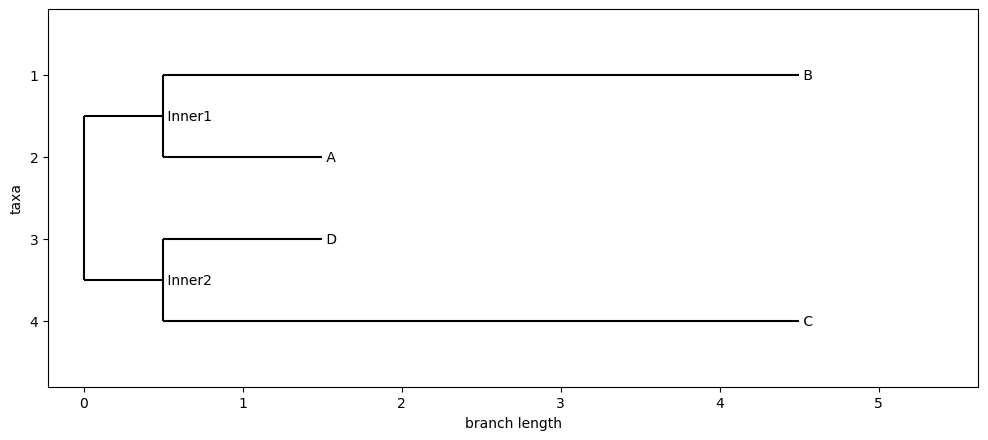

In [20]:
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceMatrix


#You should create a lower traingular matrix
mat = [[0],
       [5, 0],
       [6, 9, 0],
       [3, 6, 5, 0]]

dm = DistanceMatrix(names=['A', 'B', 'C', 'D'], matrix=mat)

print(dm)

constructor = DistanceTreeConstructor()

tree = constructor.nj(dm)

tree.root_at_midpoint()

fig = plt.figure(figsize=(12, 5), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(tree, axes=axes)

Create a phylogenetic tree from the distance matrix that resulted from your pairwise alignments of the coronavirus strains.

**Add your answer below**

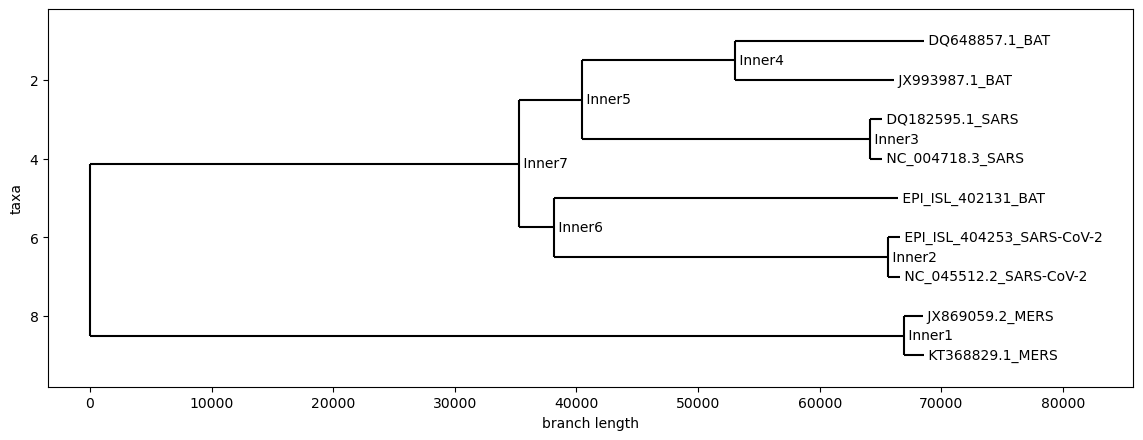

Tree(rooted=True)
    Clade(branch_length=0)
        Clade(branch_length=35254.65625, name='Inner7')
            Clade(branch_length=5219.8125, name='Inner5')
                Clade(branch_length=12543.624999999993, name='Inner4')
                    Clade(branch_length=15591.5625, name='DQ648857.1_BAT')
                    Clade(branch_length=13048.4375, name='JX993987.1_BAT')
                Clade(branch_length=23668.125000000007, name='Inner3')
                    Clade(branch_length=946.5999999999985, name='DQ182595.1_SARS')
                    Clade(branch_length=1003.4000000000015, name='NC_004718.3_SARS')
            Clade(branch_length=2912.9375, name='Inner6')
                Clade(branch_length=28227.8125, name='EPI_ISL_402131_BAT')
                Clade(branch_length=27481.6875, name='Inner2')
                    Clade(branch_length=951.8333333333358, name='EPI_ISL_404253_SARS-CoV-2')
                    Clade(branch_length=950.1666666666642, name='NC_045512.2_SARS-CoV-2')
  

In [22]:
distance_matrix = scores_to_distance_matrix('scores_genomes.txt')
genomes_dm = DistanceMatrix(names=[key for key in genome_dict.keys()], matrix = distance_matrix)
constructor = DistanceTreeConstructor()
genomes_tree = constructor.nj(genomes_dm)
genomes_tree.root_at_midpoint()
fig = plt.figure(figsize=(14, 5), dpi=100)
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(genomes_tree, axes=axes)

# The following function prints the brenches` length, thus it helps to determine the distance between two leafes.
print(genomes_tree)


Look at the tree. For each strain (leaf), write the strain that has the minimal distance to it in the tree, and the strain that has the maximal distance to it in the tree. Does it make sense from what you know about the different strains?

**Add your answer below**

Please view our answer in the file "Distance Tree Analysis.pdf"

What might be the origin of SARS-CoV-2, according to the tree? Explain

**Add your answer below**

Please view our answer in the file "Distance Tree Analysis.pdf"

If we wanted to apply the Fitch algorithm for these strains, for a specific topology, what would we have to do instead of the pairwise global alignment?

**Add your answer below**

Instead of pairwise global alignment, we would have created mutual alignment of all 9 strains. 
Then we would have iterated through each position of the alignment individually, as we assume the different positions are not depended on each other. 
In each iteration we would go from bottom to top and then from top to bottom to determine which character is more likely to appear in each and every inner node of the tree.
When going from bottom to top - the father of two nodes with the same character will "inherit" their character, otherwise it will hold a group of all characters his nodes hold.
When going from top to bottom - for each node that holds a group of characters only one will be chosen, preferable identical character to the character the father of the same node. 
It will allow us to compute the hamming distance of each position. The total hamming distance would be the sum of hamming distance of each position. 
**Notes:**
- Iteration of positions in which all characters are identical may be skipped
- Deletions in the alignment can be ignored